# Objetivo  
Entender os diferentes impactos resultantes de diferentes medidas de restrição contra o avanço da COVID-19 no Brasil. Foram comparados o lockdown de Araraquara, a fase emergencial da cidade de São Paulo e a fase roxa da cidade de Belo Horizonte.

# Conclusões (lockdown vs fase emergencial)

## Araraquara (Lockdown)

10 dias de lockdown em Araraquara demoraram:  
* Em média, de 5 a 6 dias pra frear o avanço;  
* De 10 a 11 dias a partir do seu início para mostrar queda nos casos;  
* Uma média de 20 dias a partir do seu início para chegar no vale;
* Uma média de 24 dias a partir do seu início para mostrar queda nas mortes;
* Uma média de 30 dias a partir do seu início pra chegar no vale em numero de mortos.

## São Paulo (fase emergencial)

A fase emergencial de 27 dias demora na cidade de são paulo demorou:  
* Em média, 17 dias pra frear o avanço;  
* De 24 a 28 dias a partir do seu início para mostrar queda nos casos;  
* Uma média de 54 dias a partir do seu início para chegar no (provável) vale.
* Uma média de 33 dias a partir do seu início para mostrar queda nas mortes;
* Uma média de 52 dias a partir do seu início pra chegar no vale do numero de mortos.

## Belo Horizonte (fase roxa)

A fase roxa de 31 dias ainda não demonstrou resultado expressivos que possam ser analisados.

# Importando bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# Importação e limpeza da base

##Importação

In [2]:
caminho = '/content/drive/MyDrive/Lives/Impacto quarentena/HIST_PAINEL_COVIDBR_09mai2021.csv'
dados_covid = pd.read_csv(caminho, engine='python', encoding='UTF-8', sep=';')
dados_covid.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


## Limpeza

In [3]:
dados_covid['data'] = dados_covid['data'].astype('datetime64') #as datetime

# Araraquara (Lockdown)

## Limpeza Araraquara

In [4]:
dados_araraquara = dados_covid.query('municipio == "Araraquara"')
dados_araraquara.reset_index(inplace=True, drop=True)
dados_araraquara.head(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Sudeste,SP,Araraquara,35,350320.0,35031.0,CENTRAL DO DRS III,2020-03-27,13,236072.0,0,0,0,0,NaN,NaN,0.0
1,Sudeste,SP,Araraquara,35,350320.0,35031.0,CENTRAL DO DRS III,2020-03-28,13,236072.0,0,0,0,0,NaN,NaN,0.0
2,Sudeste,SP,Araraquara,35,350320.0,35031.0,CENTRAL DO DRS III,2020-03-29,14,236072.0,0,0,0,0,NaN,NaN,0.0
3,Sudeste,SP,Araraquara,35,350320.0,35031.0,CENTRAL DO DRS III,2020-03-30,14,236072.0,0,0,0,0,NaN,NaN,0.0
4,Sudeste,SP,Araraquara,35,350320.0,35031.0,CENTRAL DO DRS III,2020-03-31,14,236072.0,0,0,0,0,NaN,NaN,0.0
5,Sudeste,SP,Araraquara,35,350320.0,35031.0,CENTRAL DO DRS III,2020-04-01,14,236072.0,0,0,0,0,NaN,NaN,0.0
6,Sudeste,SP,Araraquara,35,350320.0,35031.0,CENTRAL DO DRS III,2020-04-02,14,236072.0,1,1,0,0,NaN,NaN,0.0
7,Sudeste,SP,Araraquara,35,350320.0,35031.0,CENTRAL DO DRS III,2020-04-03,14,236072.0,2,1,0,0,NaN,NaN,0.0
8,Sudeste,SP,Araraquara,35,350320.0,35031.0,CENTRAL DO DRS III,2020-04-04,14,236072.0,2,0,0,0,NaN,NaN,0.0
9,Sudeste,SP,Araraquara,35,350320.0,35031.0,CENTRAL DO DRS III,2020-04-05,15,236072.0,2,0,0,0,NaN,NaN,0.0


In [5]:
# Precisa limpar pq semana epidemiologica reseta na virada do ano

dados_araraquara[282:]['semanaEpi'] = (dados_araraquara[282:]['semanaEpi'] + 53)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
dados_araraquara.info() # checando datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   regiao                  409 non-null    object        
 1   estado                  409 non-null    object        
 2   municipio               409 non-null    object        
 3   coduf                   409 non-null    int64         
 4   codmun                  409 non-null    float64       
 5   codRegiaoSaude          409 non-null    float64       
 6   nomeRegiaoSaude         409 non-null    object        
 7   data                    409 non-null    datetime64[ns]
 8   semanaEpi               409 non-null    int64         
 9   populacaoTCU2019        409 non-null    float64       
 10  casosAcumulado          409 non-null    int64         
 11  casosNovos              409 non-null    int64         
 12  obitosAcumulado         409 non-null    int64     

## Série Temporal (Casos)

### Por média móvel

In [12]:
dados_araraquara_novoscasos_temporal['casosNovos_media7'] = dados_araraquara_novoscasos_temporal['casosNovos'].rolling(7).mean().round(3) # transformando em média móvel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
dados_araraquara_novoscasos_temporal.head()

,data,casosNovos,casosNovos_media7
0,2020-03-27,0,NaN
1,2020-03-28,0,NaN
2,2020-03-29,0,NaN
3,2020-03-30,0,NaN
4,2020-03-31,0,NaN


Plotando por média móvel

Text(0.5, 0, 'Dia')

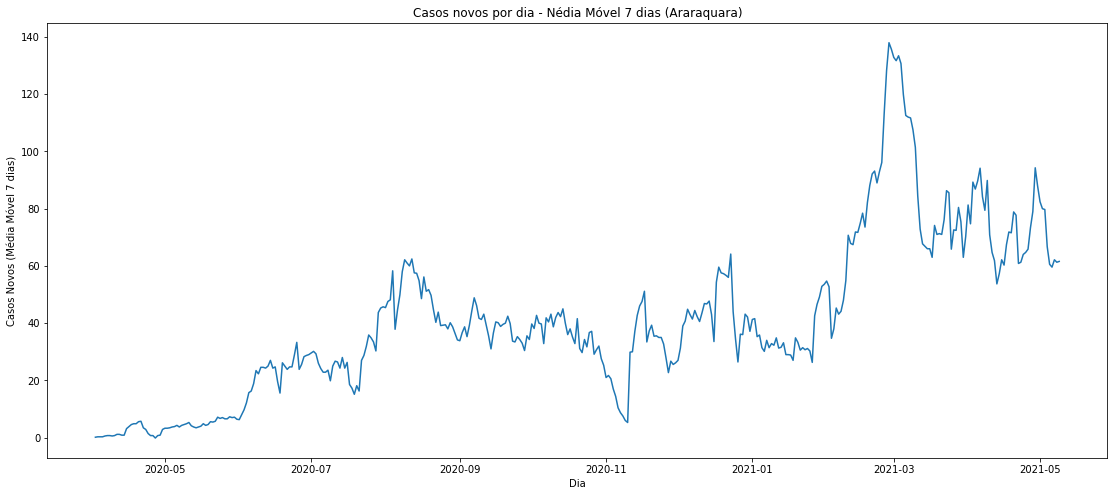

In [14]:
plt.figure(figsize=(19,8))
sns.lineplot(data=dados_araraquara_novoscasos_temporal, x='data', y='casosNovos_media7')
plt.title('Casos novos por dia - Nédia Móvel 7 dias (Araraquara)')
plt.ylabel('Casos Novos (Média Móvel 7 dias)')
plt.xlabel('Dia')

Text(0.5, 0, 'Dia')

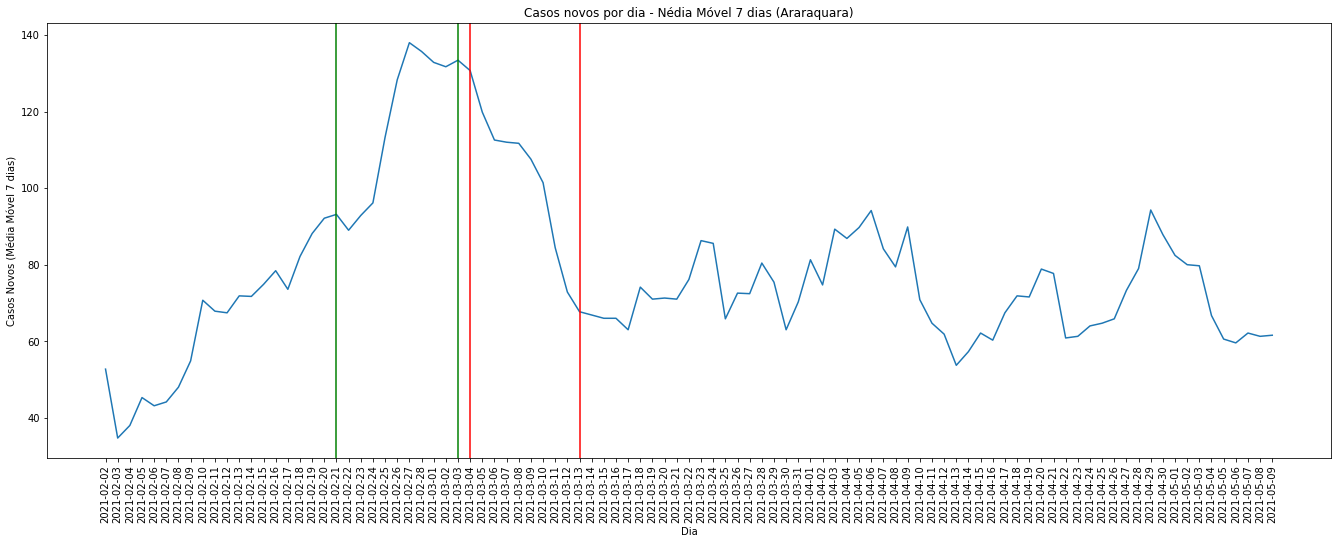

In [15]:
plt.figure(figsize=(23,8))
sns.lineplot(data=dados_araraquara_novoscasos_temporal.query('data > "2021-02-01"'), x='data', y='casosNovos_media7') # zoom de fev pra frente
plt.title('Casos novos por dia - Nédia Móvel 7 dias (Araraquara)')
plt.ylabel('Casos Novos (Média Móvel 7 dias)')
plt.axvline(dt.datetime(2021,2,21), color='green')
plt.axvline(dt.datetime(2021,3,3), color='green')
plt.axvline(dt.datetime(2021,3,4), color='red')
plt.axvline(dt.datetime(2021,3,13), color='red')
plt.xticks(dados_araraquara_novoscasos_temporal.query('data > "2021-02-01"')['data'], rotation=90)
plt.xlabel('Dia')

Em verde: dias de lockdown;  
Em vermelho: queda pós lockdown.

De acordo com o gráfico acima, podemos notar que um lockdown de 10 dias demora:  
* Em média, de 5 a 6 dias pra frear o avanço;  
* De 10 a 11 dias a partir do seu início para mostrar queda nos casos;  
* Uma média de 20 dias a partir do seu início para chegar no vale.

## Série Temporal (Mortes)

### Por média móvel

In [16]:
dados_araraquara_novosobitos_temporal = dados_araraquara[['data', 'obitosNovos']]

In [17]:
dados_araraquara_novosobitos_temporal['obitosNovos_media7'] = dados_araraquara_novosobitos_temporal['obitosNovos'].rolling(7).mean().round(3) # transformando em média móvel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
dados_araraquara_novosobitos_temporal.head()

,data,obitosNovos,obitosNovos_media7
0,2020-03-27,0,NaN
1,2020-03-28,0,NaN
2,2020-03-29,0,NaN
3,2020-03-30,0,NaN
4,2020-03-31,0,NaN


Plotando por média móvel

Text(0.5, 0, 'Dia')

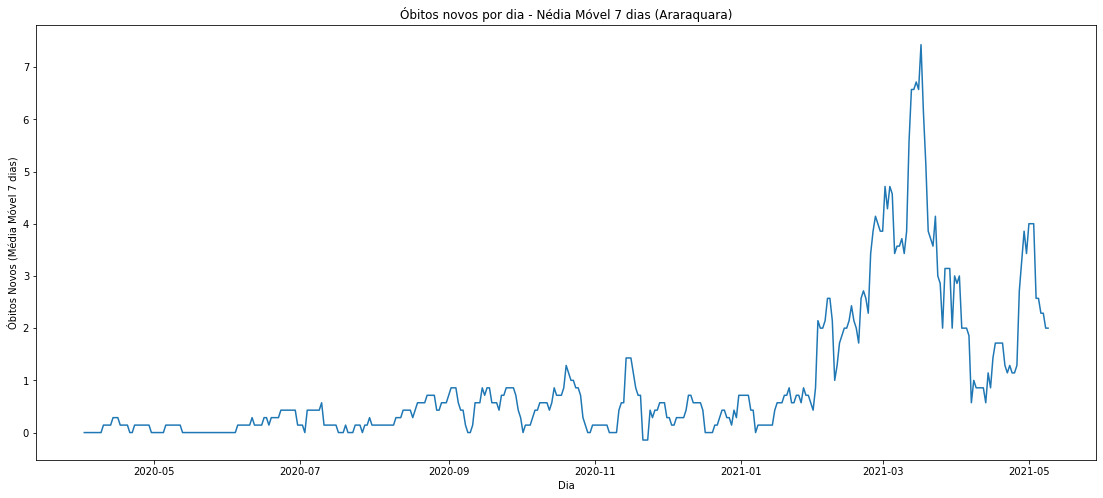

In [19]:
plt.figure(figsize=(19,8))
sns.lineplot(data=dados_araraquara_novosobitos_temporal, x='data', y='obitosNovos_media7')
plt.title('Óbitos novos por dia - Nédia Móvel 7 dias (Araraquara)')
plt.ylabel('Óbitos Novos (Média Móvel 7 dias)')
plt.xlabel('Dia')

Text(0.5, 0, 'Dia')

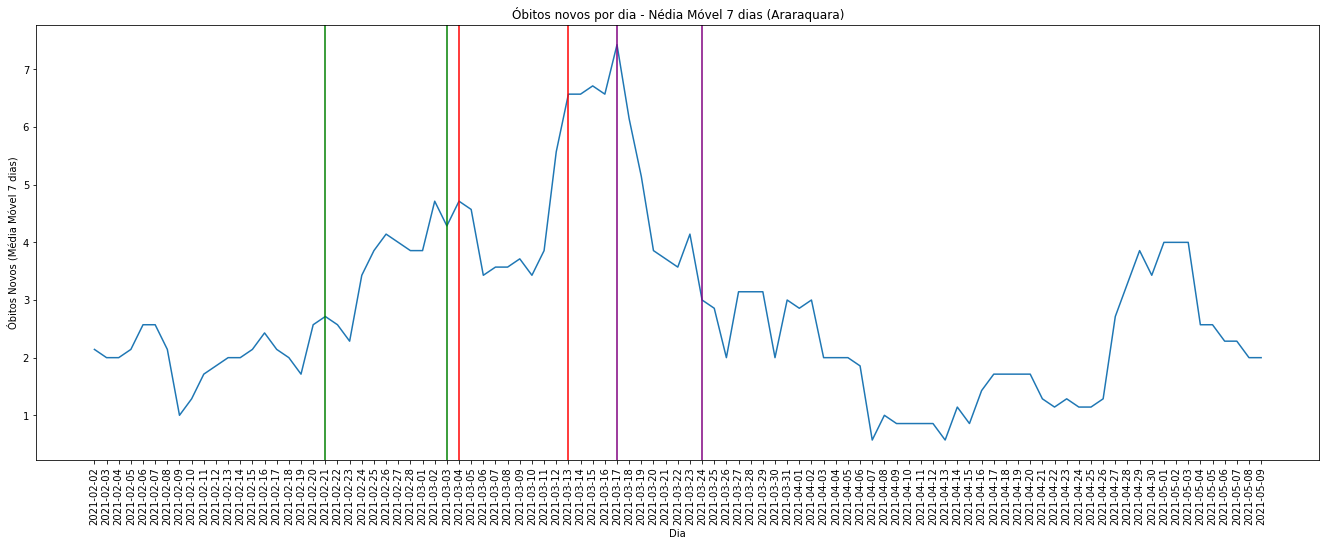

In [20]:
plt.figure(figsize=(23,8))
sns.lineplot(data=dados_araraquara_novosobitos_temporal.query('data > "2021-02-01"'), x='data', y='obitosNovos_media7') # zoom de fev pra frente
plt.title('Óbitos novos por dia - Nédia Móvel 7 dias (Araraquara)')
plt.ylabel('Óbitos Novos (Média Móvel 7 dias)')
plt.axvline(dt.datetime(2021,2,21), color='green')
plt.axvline(dt.datetime(2021,3,3), color='green')
plt.axvline(dt.datetime(2021,3,4), color='red')
plt.axvline(dt.datetime(2021,3,13), color='red')
plt.axvline(dt.datetime(2021,3,17), color='purple')
plt.axvline(dt.datetime(2021,3,24), color='purple')
plt.xticks(dados_araraquara_novoscasos_temporal.query('data > "2021-02-01"')['data'], rotation=90)
plt.xlabel('Dia')

Em verde: dias de lockdown;  
Em vermelho: queda de casos pós lockdown.  
Em roxo: queda de mortes pós lockdown.

De acordo com o gráfico acima, podemos notar que um lockdown de 10 dias demora:  
* Em média, de 5 a 6 dias pra frear o avanço;  
* De 10 a 11 dias a partir do seu início para mostrar queda nos casos;  
* Uma média de 20 dias a partir do seu início para chegar no vale;
* Uma média de 24 dias a partir do seu início para mostrar queda nas mortes;
* Uma média de 30 dias a partir do seu início pra chegar no vale.

# Cidade de São Paulo

In [21]:
dados_covid_munsaopaulo = dados_covid.query('municipio == "São Paulo"')
dados_covid_munsaopaulo.reset_index(drop=True, inplace=True)
dados_covid_munsaopaulo.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020-03-27,13,12252023.0,0,0,0,0,NaN,NaN,1.0
1,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020-03-28,13,12252023.0,1149,1149,76,76,NaN,NaN,1.0
2,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020-03-29,14,12252023.0,1183,34,89,13,NaN,NaN,1.0
3,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020-03-30,14,12252023.0,1233,50,103,14,NaN,NaN,1.0
4,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020-03-31,14,12252023.0,1885,652,121,18,NaN,NaN,1.0


## Série Temporal (Casos)

### Por média móvel

In [22]:
dados_covid_munsaopaulo_temporal = dados_covid_munsaopaulo[['data', 'casosNovos']]

In [23]:
dados_covid_munsaopaulo_temporal['casosNovos_media7'] = dados_covid_munsaopaulo_temporal['casosNovos'].rolling(7).mean().round(3) # transformando em média móvel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
dados_covid_munsaopaulo_temporal.head()

,data,casosNovos,casosNovos_media7
0,2020-03-27,0,NaN
1,2020-03-28,1149,NaN
2,2020-03-29,34,NaN
3,2020-03-30,50,NaN
4,2020-03-31,652,NaN


Plotando por média móvel

Text(0.5, 0, 'Dia')

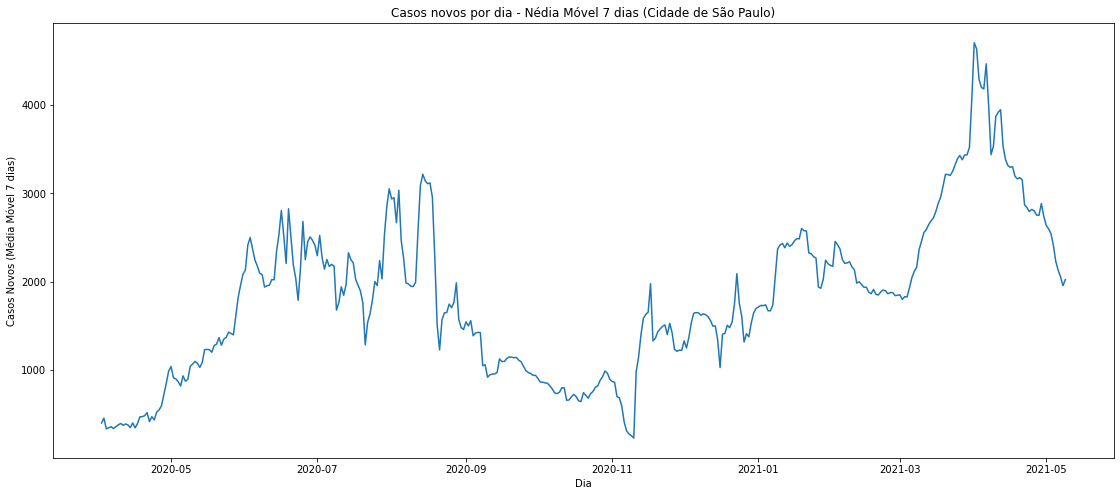

In [25]:
plt.figure(figsize=(19,8))
sns.lineplot(data=dados_covid_munsaopaulo_temporal, x='data', y='casosNovos_media7')
plt.title('Casos novos por dia - Nédia Móvel 7 dias (Cidade de São Paulo)')
plt.ylabel('Casos Novos (Média Móvel 7 dias)')
plt.xlabel('Dia')

Text(0.5, 0, 'Dia')

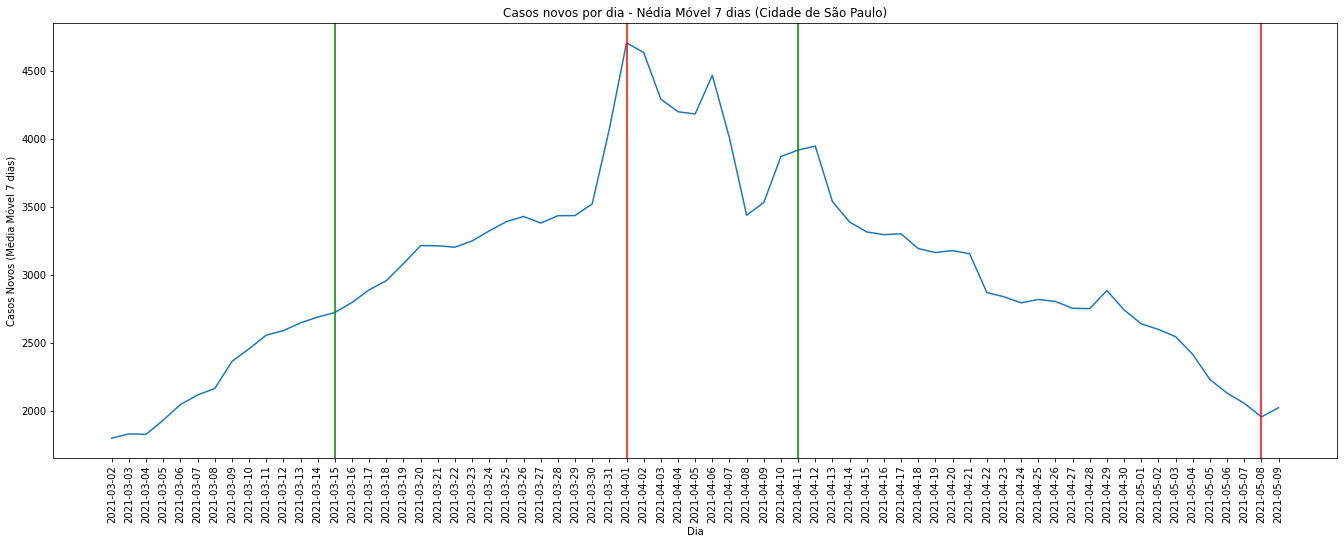

In [26]:
plt.figure(figsize=(23,8))
sns.lineplot(data=dados_covid_munsaopaulo_temporal.query('data > "2021-03-01"'), x='data', y='casosNovos_media7') # zoom de fev pra frente
plt.title('Casos novos por dia - Nédia Móvel 7 dias (Cidade de São Paulo)')
plt.ylabel('Casos Novos (Média Móvel 7 dias)')
plt.axvline(dt.datetime(2021,3,15), color='green')
plt.axvline(dt.datetime(2021,4,11), color='green')
plt.axvline(dt.datetime(2021,4,1), color='red')
plt.axvline(dt.datetime(2021,5,8), color='red')
plt.xticks(dados_covid_munsaopaulo_temporal.query('data > "2021-03-01"')['data'], rotation=90)
plt.xlabel('Dia')

Em verde: dias de lockdown;  
Em vermelho: queda pós lockdown.

De acordo com o gráfico acima, podemos notar que a fase emergencial de 27 dias demora:  
* Em média, 17 dias pra frear o avanço;  
* De 24 a 28 dias a partir do seu início para mostrar queda nos casos;  
* Uma média de 54 dias a partir do seu início para chegar no (provável) vale.

## Série Temporal (Mortes)

### Por média móvel

In [27]:
dados_covid_munsaopaulo_novosobitos_temporal = dados_covid_munsaopaulo[['data', 'obitosNovos']]

In [28]:
dados_covid_munsaopaulo_novosobitos_temporal['obitosNovos_media7'] = dados_covid_munsaopaulo_novosobitos_temporal['obitosNovos'].rolling(7).mean().round(3) # transformando em média móvel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
dados_covid_munsaopaulo_novosobitos_temporal.head()

,data,obitosNovos,obitosNovos_media7
0,2020-03-27,0,NaN
1,2020-03-28,76,NaN
2,2020-03-29,13,NaN
3,2020-03-30,14,NaN
4,2020-03-31,18,NaN


Plotando por média móvel

Text(0.5, 0, 'Dia')

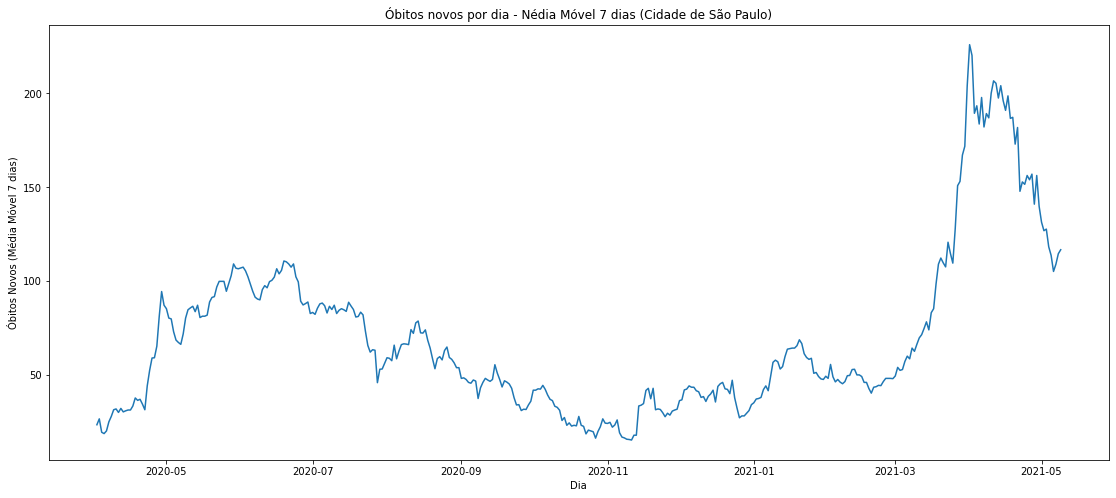

In [30]:
plt.figure(figsize=(19,8))
sns.lineplot(data=dados_covid_munsaopaulo_novosobitos_temporal, x='data', y='obitosNovos_media7')
plt.title('Óbitos novos por dia - Nédia Móvel 7 dias (Cidade de São Paulo)')
plt.ylabel('Óbitos Novos (Média Móvel 7 dias)')
plt.xlabel('Dia')

Text(0.5, 0, 'Dia')

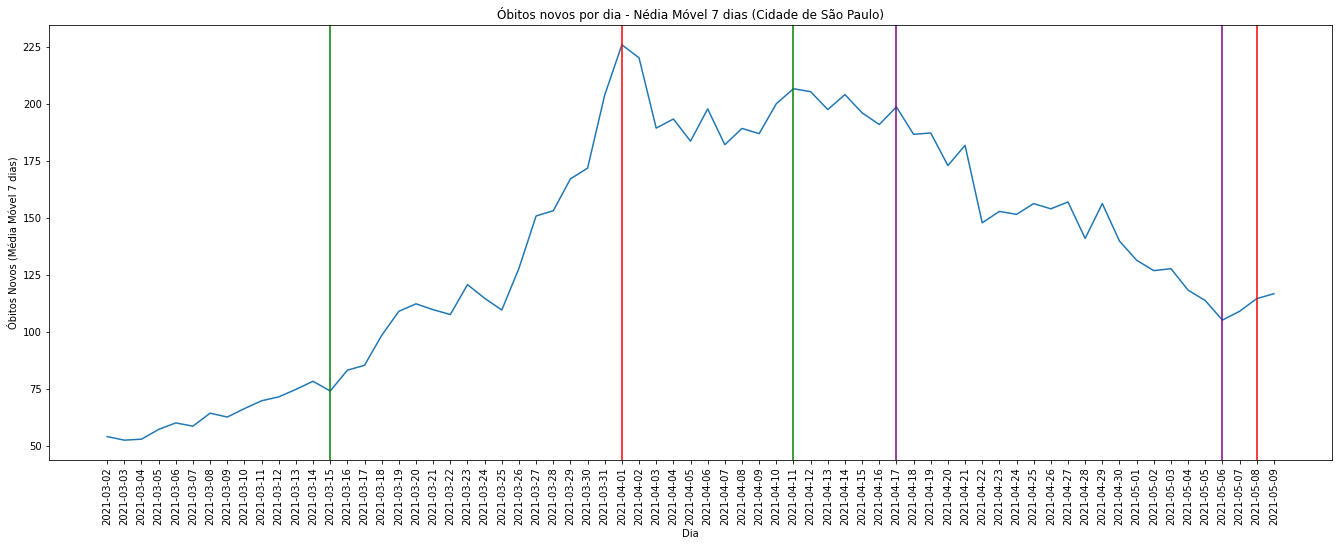

In [31]:
plt.figure(figsize=(23,8))
sns.lineplot(data=dados_covid_munsaopaulo_novosobitos_temporal.query('data > "2021-03-01"'), x='data', y='obitosNovos_media7') # zoom de fev pra frente
plt.title('Óbitos novos por dia - Nédia Móvel 7 dias (Cidade de São Paulo)')
plt.ylabel('Óbitos Novos (Média Móvel 7 dias)')
plt.axvline(dt.datetime(2021,3,15), color='green')
plt.axvline(dt.datetime(2021,4,11), color='green')
plt.axvline(dt.datetime(2021,4,1), color='red')
plt.axvline(dt.datetime(2021,5,8), color='red')
plt.axvline(dt.datetime(2021,4,17), color='purple')
plt.axvline(dt.datetime(2021,5,6), color='purple')
plt.xticks(dados_covid_munsaopaulo_temporal.query('data > "2021-03-01"')['data'], rotation=90)
plt.xlabel('Dia')

Em verde: dias de fase emergencial;  
Em vermelho: queda de casos pós emergencial.  
Em roxo: queda de mortes pós emergencial.

De acordo com o gráfico acima, podemos notar que a fase emergencial de 27 dias demora:  
* Em média, 17 dias pra frear o avanço;  
* De 24 a 28 dias a partir do seu início para mostrar queda nos casos;  
* Uma média de 54 dias a partir do seu início para chegar no (provável) vale.
* Uma média de 33 dias a partir do seu início para mostrar queda nas mortes;
* Uma média de 52 dias a partir do seu início pra chegar no vale do numero de mortos.

# Cidade de Belo Horizonte

In [32]:
dados_covid_bh = dados_covid.query('municipio == "Belo Horizonte"')
dados_covid_bh.reset_index(drop=True, inplace=True)
dados_covid_bh.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Sudeste,MG,Belo Horizonte,31,310620.0,31016.0,BELO HORIZONTE/ NOVA LIMA/ CAETE,2020-03-27,13,2512070.0,0,0,0,0,NaN,NaN,1.0
1,Sudeste,MG,Belo Horizonte,31,310620.0,31016.0,BELO HORIZONTE/ NOVA LIMA/ CAETE,2020-03-28,13,2512070.0,129,129,0,0,NaN,NaN,1.0
2,Sudeste,MG,Belo Horizonte,31,310620.0,31016.0,BELO HORIZONTE/ NOVA LIMA/ CAETE,2020-03-29,14,2512070.0,143,14,0,0,NaN,NaN,1.0
3,Sudeste,MG,Belo Horizonte,31,310620.0,31016.0,BELO HORIZONTE/ NOVA LIMA/ CAETE,2020-03-30,14,2512070.0,163,20,1,1,NaN,NaN,1.0
4,Sudeste,MG,Belo Horizonte,31,310620.0,31016.0,BELO HORIZONTE/ NOVA LIMA/ CAETE,2020-03-31,14,2512070.0,163,0,2,1,NaN,NaN,1.0


## Série Temporal (Casos)

### Por média móvel

In [33]:
dados_covid_bh_temporal = dados_covid_bh[['data', 'casosNovos']]

In [34]:
dados_covid_bh_temporal['casosNovos_media7'] = dados_covid_bh_temporal['casosNovos'].rolling(7).mean().round(3) # transformando em média móvel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
dados_covid_bh_temporal.head()

,data,casosNovos,casosNovos_media7
0,2020-03-27,0,NaN
1,2020-03-28,129,NaN
2,2020-03-29,14,NaN
3,2020-03-30,20,NaN
4,2020-03-31,0,NaN


Plotando por média móvel

Text(0.5, 0, 'Dia')

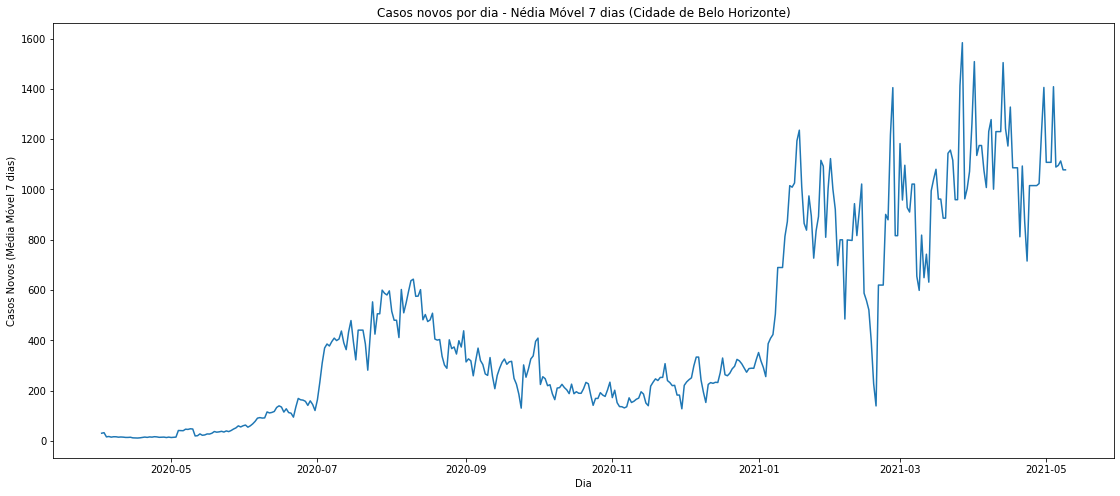

In [36]:
plt.figure(figsize=(19,8))
sns.lineplot(data=dados_covid_bh_temporal, x='data', y='casosNovos_media7')
plt.title('Casos novos por dia - Nédia Móvel 7 dias (Cidade de Belo Horizonte)')
plt.ylabel('Casos Novos (Média Móvel 7 dias)')
plt.xlabel('Dia')

Text(0.5, 0, 'Dia')

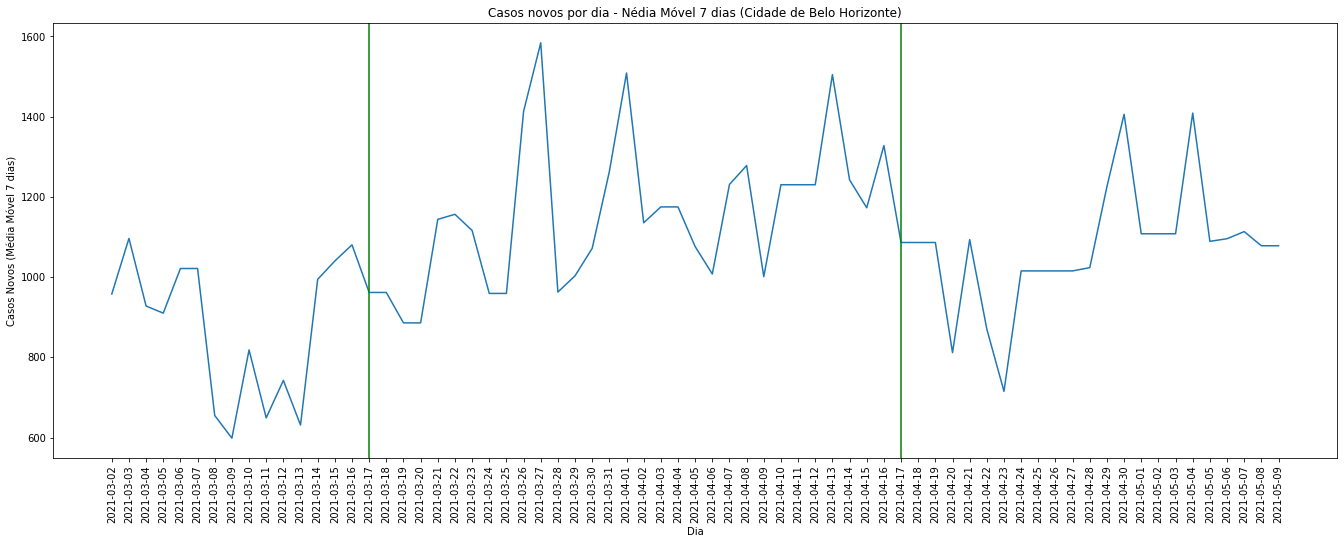

In [44]:
plt.figure(figsize=(23,8))
sns.lineplot(data=dados_covid_bh_temporal.query('data > "2021-03-01"'), x='data', y='casosNovos_media7') # zoom de fev pra frente
plt.title('Casos novos por dia - Nédia Móvel 7 dias (Cidade de Belo Horizonte)')
plt.ylabel('Casos Novos (Média Móvel 7 dias)')
plt.axvline(dt.datetime(2021,3,17), color='green')
plt.axvline(dt.datetime(2021,4,17), color='green')
#plt.axvline(dt.datetime(2021,4,1), color='red')
#plt.axvline(dt.datetime(2021,5,8), color='red')
plt.xticks(dados_covid_bh_temporal.query('data > "2021-03-01"')['data'], rotation=90)
plt.xlabel('Dia')

Em verde: dias de lockdown;  
Em vermelho: queda pós lockdown (não foi possível detectar queda).

## Série Temporal (Mortes)

### Por média móvel

In [38]:
dados_covid_bh_novosobitos_temporal = dados_covid_bh[['data', 'obitosNovos']]

In [39]:
dados_covid_bh_novosobitos_temporal['obitosNovos_media7'] = dados_covid_bh_novosobitos_temporal['obitosNovos'].rolling(7).mean().round(3) # transformando em média móvel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
dados_covid_bh_novosobitos_temporal.head()

,data,obitosNovos,obitosNovos_media7
0,2020-03-27,0,NaN
1,2020-03-28,0,NaN
2,2020-03-29,0,NaN
3,2020-03-30,1,NaN
4,2020-03-31,1,NaN


Plotando por média móvel

Text(0.5, 0, 'Dia')

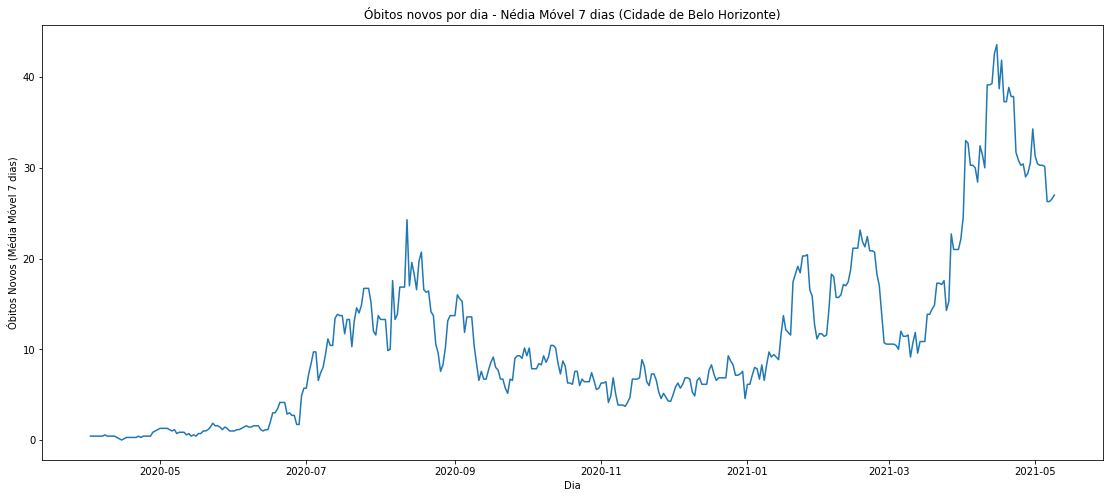

In [41]:
plt.figure(figsize=(19,8))
sns.lineplot(data=dados_covid_bh_novosobitos_temporal, x='data', y='obitosNovos_media7')
plt.title('Óbitos novos por dia - Nédia Móvel 7 dias (Cidade de Belo Horizonte)')
plt.ylabel('Óbitos Novos (Média Móvel 7 dias)')
plt.xlabel('Dia')

Text(0.5, 0, 'Dia')

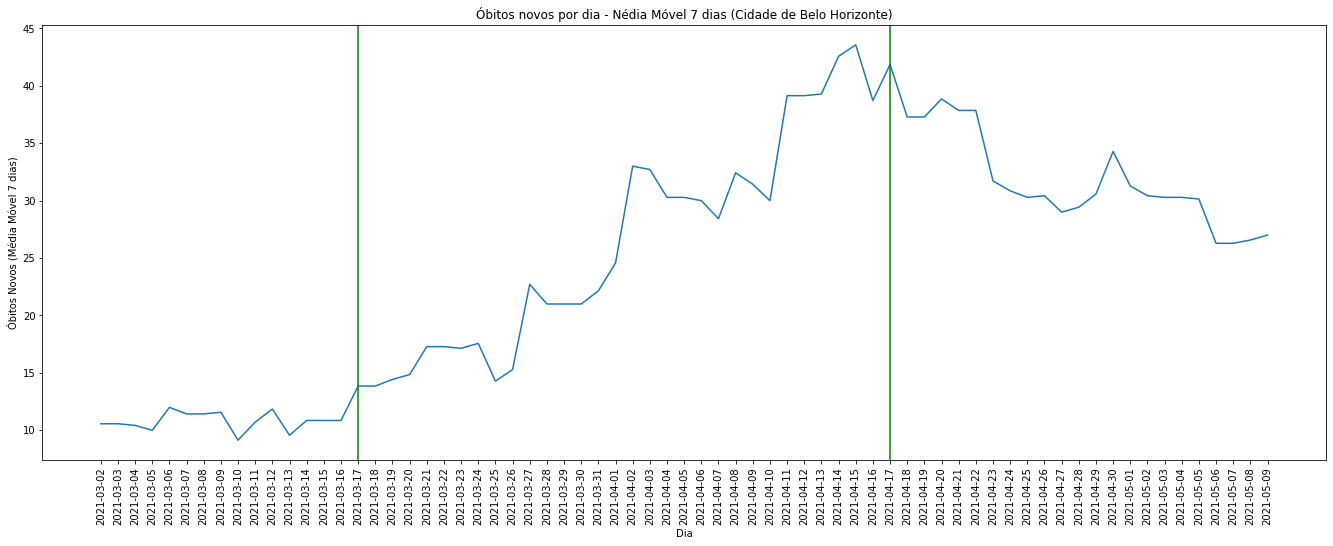

In [43]:
plt.figure(figsize=(23,8))
sns.lineplot(data=dados_covid_bh_novosobitos_temporal.query('data > "2021-03-01"'), x='data', y='obitosNovos_media7') # zoom de mar pra frente
plt.title('Óbitos novos por dia - Nédia Móvel 7 dias (Cidade de Belo Horizonte)')
plt.ylabel('Óbitos Novos (Média Móvel 7 dias)')
plt.axvline(dt.datetime(2021,3,17), color='green')
plt.axvline(dt.datetime(2021,4,17), color='green')
#plt.axvline(dt.datetime(2021,4,1), color='red')
#plt.axvline(dt.datetime(2021,5,8), color='red')
#plt.axvline(dt.datetime(2021,4,17), color='purple')
#plt.axvline(dt.datetime(2021,5,6), color='purple')
plt.xticks(dados_covid_munsaopaulo_temporal.query('data > "2021-03-01"')['data'], rotation=90)
plt.xlabel('Dia')

Em verde: dias de fase roxa;  
Ainda não há leitura para os resultados da fase roxa em BH.